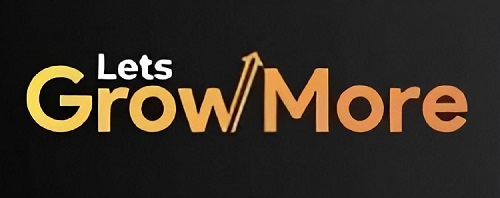

# Introduction:
## Problem Statement:
To execute stock market prediction and forecasting using Stacked LSTM(Long Stort-Term Memory).
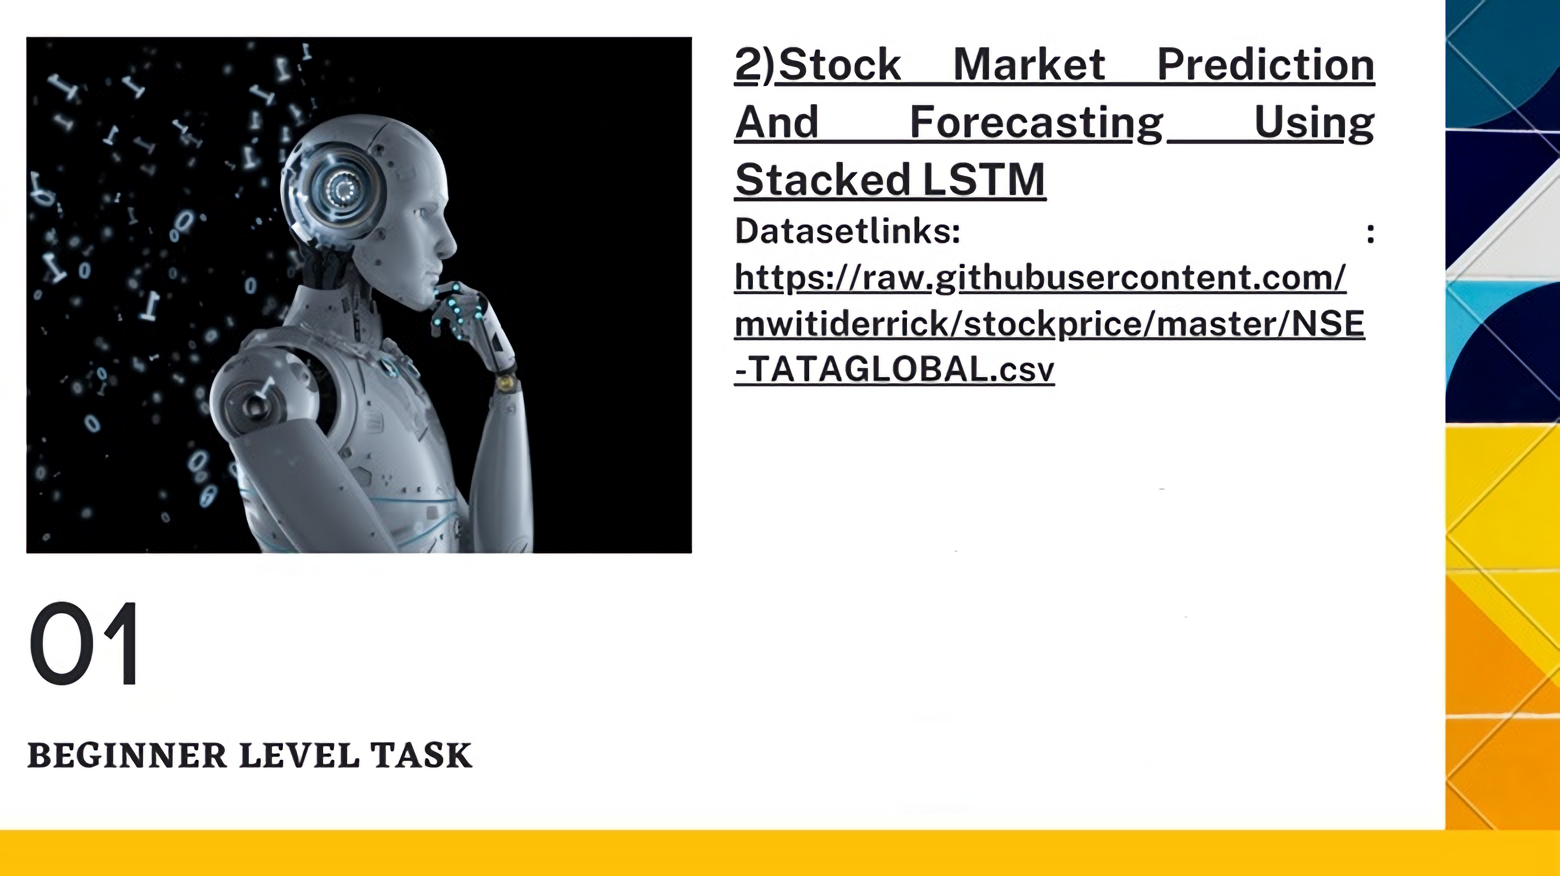

-------
*Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.*

*This is a behavior required in complex problem domains like machine translation, speech recognition, and more.*

*LSTMs are a complex area of deep learning. It can be hard to get your hands around what LSTMs are, and how terms like bidirectional and sequence-to-sequence relate to the field.*

*The Stacked LSTM is an extension to this model that has multiple hidden LSTM layers where each layer contains multiple memory cells.*

---------------------
## What are Stocks?
***Stocks, or shares of a company, represent ownership equity in the firm, which give shareholders voting rights as well as a residual claim on corporate earnings in the form of capital gains and dividends.***

-------------
## Stock Market:
***Stock markets are where individual and institutional investors come together to buy and sell shares in a public venue. Nowadays these exchanges exist as electronic marketplaces.***

--------------
## Share Prices:
***Share prices are set by supply and demand in the market as buyers and sellers place orders. Order flow and bid-ask spreads are often maintained by specialists or market makers to ensure an orderly and fair market.***

-----------
LSTM is very sensitive to the scale of the data, Here the scale of the Close value is in a kind of scale, we should always try to transform the value.

**LSTM has three gates:**
* The input gate: The input gate adds information to the cell state,
* The forget gate: It removes the information that is no longer required by the model,
* The output gate: Output Gate at LSTM selects the information to be shown as output.
----------------

In [1]:
# install yfinance library
!pip install yfinance

# Importing the necessary libraries:

In [17]:
import yfinance as yf   #for fetching historical stock data
import numpy as np #for numerical operations
import pandas as pd #for row or column wise operations
import plotly.graph_objects as go # plotting closing values
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf # dor DL pipelines

"YFINANCE" API comes with a download option that can download historical data.
> download(ticker, start, end, interval)


The first arguement passed inside download() is "TICKER" or "STOCK SYMBOL"- is a unique series of lettes assigned to a security for trading purposes.

The second arguement of download()is 'start' which is the date of which the stocks needed to be fetched from.
We can also set the 'end' date parameter in download(), but if it is none then it default takes the date before the current date.

The interval arguement in download() is the frequency at which we fetch our data.

But resolution data is limited to 60 days only

For example: TICKER for microsoft is "MSFT" & TICKER for apple is "AAPL"

***In this project we are going to predict the stock prices for google company and its respective TICKER is - GOOGL.***

In [4]:
#reading data into the Data Frame

df = yf.download("GOOGL", start="2019-01-01", interval ='1d')

[*********************100%***********************]  1 of 1 completed


In [5]:
df.shape

(685, 6)

In [6]:
df.head() #glimpse of the df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,1057.829956,1062.989990,1033.040039,1044.959961,1044.959961,1655500
2019-01-02,1027.199951,1060.790039,1025.280029,1054.680054,1054.680054,1593400
2019-01-03,1050.670044,1066.260010,1022.369995,1025.469971,1025.469971,2098000
2019-01-04,1042.560059,1080.000000,1036.859985,1078.069946,1078.069946,2301100
2019-01-07,1080.969971,1082.699951,1062.640015,1075.920044,1075.920044,2372300


We can notice that out dataset is indexed with dates and we have 6 columns.

In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

**Understanding each columns**

* The trades on stock market happen between two time intervals.
  
  For example:

      The trading session for Google stock exchange is between 9.30am and 4pm.

      The stock price at 9.30am is called "Open" and price at 4pm is called "close" 

* The indicators that determine the highest and least values of a particular stock traded that day are 'High' and 'low' respectively.

* ***Adjusted Close:***

    >The adjusted closing price amends a stock's closing price to reflect that     stock's value after accounting for any corporate actions.

    >These actions could be stock splits, dividend and rights offerings.

* ***Volume:***
    >Trading volume is a measure of how much a given financial asset has    traded in a period of time.
    
    >For stocks, volume is measured in the number of shares traded.


In [8]:
# sorting the data points based on indexes just for confirmation
df.sort_index(inplace=True)

In [9]:
# removal of duplicate indices
df=df.loc[~df.index.duplicated(keep='first')]

In [10]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-13,2838.989990,2859.00000,2825.000000,2846.649902,2846.649902,1104700
2021-09-14,2859.909912,2867.26001,2835.000000,2850.889893,2850.889893,983700
2021-09-15,2855.429932,2889.01001,2826.949951,2888.590088,2888.590088,1370400
2021-09-16,2879.010010,2886.00000,2848.030029,2872.199951,2872.199951,1309500
2021-09-17,2860.610107,2869.00000,2809.399902,2816.000000,2816.000000,2666800


We can see that the records are till that of 17th September 2021.

In [12]:
# Checking for missing values 
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

*The data returned with "yfinance" is quite clean and is free of missing values.*

In [14]:
# Getting the statistics of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,685.000000,685.000000,685.000000,685.000000,685.000000,6.850000e+02
mean,1592.990436,1609.016757,1577.895753,1594.497284,1594.497284,1.695632e+06
std,496.279405,498.987549,493.446098,496.535077,496.535077,8.153743e+05
min,1027.199951,1050.000000,1008.869995,1025.469971,1025.469971,4.656000e+05
25%,1203.000000,1212.949951,1192.689941,1206.319946,1206.319946,1.179500e+06
50%,1433.020020,1444.500000,1419.500000,1433.520020,1433.520020,1.473600e+06
75%,1810.359985,1829.290039,1791.280029,1817.030029,1817.030029,1.891100e+06
max,2904.320068,2925.080078,2897.669922,2904.310059,2904.310059,6.658900e+06


**One intresting thing we see is that the difference between Q3 and Max of volume.**

**The difference between Q3 and Max is very high, this means that there are a lot of spikes in volume.**

# Data Visualisation
## Plotting Closing Values in the dataset:

In [20]:
# Checking the trend in Closing Values 
fig = go.Figure()
fig.add_trace(go.Scatter(x = df.index , y = df['Close'] , mode = 'lines'))
fig.update_layout(height = 500 , width = 900, xaxis_title='Date' , yaxis_title='Close')
fig.show()

Inference - The Closing values seem to be having a lot of Zig-Zags.

## Visualizing the Volume Graph:

In [21]:
# Checking the trend in Volume Traded
fig = go.Figure()

fig.add_trace(go.Scatter(x = df.index , y = df['Volume'] , mode = 'lines'))
fig.update_layout(height = 500 , width = 900, xaxis_title='Date' , yaxis_title='Volume')
fig.show()

Inference - A sudden spike indicates a sudden intrest in the stocks.

## Plotting Open, close, high, low values in one plot:

In [22]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = df.index , y = df['Close'] , mode = 'lines',name='Close'))
fig.add_trace(go.Scatter(x = df.index , y = df['Open'] , mode = 'lines',name='Open'))
fig.add_trace(go.Scatter(x = df.index , y = df['High'] , mode = 'lines',name='High'))
fig.add_trace(go.Scatter(x = df.index , y = df['Low'] , mode = 'lines',name='Low'))
fig.update_layout(height = 500 , width = 900, xaxis_title='Date' , yaxis_title='Open/Close/High/Low')
fig.show()

## Importing modules requires for preprocessing our data

In [23]:
# For Data Scaling
from sklearn.preprocessing import MinMaxScaler 
#to save and retrieve any python objects
import pickle
#graphical progress bar which is used to track the preprocessing in the next cell
from tqdm.notebook import tnrange 

In [24]:
# Filtering only required data 
df = df[['Close' , 'Volume']]
df.head(3)

,Close,Volume
Date,,
2018-12-31,1044.959961,1655500
2019-01-02,1054.680054,1593400
2019-01-03,1025.469971,2098000


***As we saw that open,close,high,low has similar patterns therefore we choose any one among them and filter the data.***

As movement in volume plays a crucial role in finding an increase or decrease in stock price. We will have to keep volume in our feature vector. **So, we will have close and volume as final features.**

In [26]:
# Confirming the Testing Set length 
test_length = df[(df.index >= '2021-03-01')].shape[0]

In [27]:
def CreateFeatures_and_Targets(df, feature_length):
    X = [] #features
    Y = [] #targets

    for i in tnrange(len(df) - feature_length): 
        X.append(df.iloc[i : i + feature_length,:].values)
        Y.append(df["Close"].values[i+feature_length])

    X = np.array(X)
    Y = np.array(Y)

    return X , Y

**The first arguement in the function is the filtered data passed-close,volume.**

**The second arguement in the function is the feature length, is the number of past data points, the model looks to predict the next data point.**

In [28]:
X , Y = CreateFeatures_and_Targets(df , 32)

  0%|          | 0/653 [00:00<?, ?it/s]

In [29]:
# Checking the shapes
X.shape , Y.shape

((653, 32, 6), (653,))

* The first dimension is the number of records in our features,

* Second is feature length selected,

* Third is the number of columns in the filtered data.

In [30]:
Xtrain , Xtest , Ytrain , Ytest = X[:-test_length] , X[-test_length:] , Y[:-test_length] , Y[-test_length:]

In [31]:
# Checking Training Dataset Shape 
Xtrain.shape , Ytrain.shape

((512, 32, 6), (512,))

In [32]:
# Checking Testing Dataset Shape
Xtest.shape , Ytest.shape

((141, 32, 6), (141,))

In [33]:
# Creating a Scaler to Scale Vectors with Multiple Dimensions 
class MultiDimensionScaler():
    def __init__(self):
        self.scalers = []

    def fit_transform(self , X):
        total_dims = X.shape[2]
        for i in range(total_dims):
            Scaler = MinMaxScaler()
            X[:, :, i] = Scaler.fit_transform(X[:,:,i])
            self.scalers.append(Scaler)
        return X

    def transform(self , X):
        for i in range(X.shape[2]):
            X[:, :, i] = self.scalers[i].transform(X[:,:,i])
        return X

In [34]:
Feature_Scaler = MultiDimensionScaler()
Xtrain = Feature_Scaler.fit_transform(Xtrain)
Xtest = Feature_Scaler.transform(Xtest)

In [35]:
Target_Scaler = MinMaxScaler()
Ytrain = Target_Scaler.fit_transform(Ytrain.reshape(-1,1))
Ytest = Target_Scaler.transform(Ytest.reshape(-1,1))

In [36]:
def save_object(obj , name : str):
    pickle_out = open(f"{name}.pck","wb")
    pickle.dump(obj, pickle_out)
    pickle_out.close()

def load_object(name : str):
    pickle_in = open(f"{name}.pck","rb")
    data = pickle.load(pickle_in)
    return data

In [37]:
# Saveing the objects for future purposes 
save_object(Feature_Scaler , "Feature_Scaler")
save_object(Target_Scaler , "Target_Scaler")

A **Tensorflow Callback** can be passed to keras methods such as fit, evaluate, and predict in order to hook into the various stages of the model training and inference lifecycle.

A tensorflow callback object is used to perform an action in various stages of training process, it could be at start or end of an Epoch or Step.

In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint , ReduceLROnPlateau

save_best = ModelCheckpoint("best_weights.h5", monitor='val_loss', save_best_only=True, save_weights_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.25,patience=5, min_lr=0.00001,verbose = 1)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , LSTM , Bidirectional , BatchNormalization

model = Sequential()

model.add(Bidirectional(LSTM(512 ,return_sequences=True , recurrent_dropout=0.1, input_shape=(32, 3))))
model.add(LSTM(256 ,recurrent_dropout=0.1))
model.add(Dropout(0.3))
model.add(Dense(64 , activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(32 , activation='elu'))
model.add(Dense(1 , activation='linear'))

In [40]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.002)
model.compile(loss='mse', optimizer=optimizer)

In [41]:
history = model.fit(Xtrain, Ytrain,
            epochs=10,
            batch_size = 1,
            verbose=1,
            shuffle=False ,
            validation_data=(Xtest , Ytest),
            callbacks=[reduce_lr , save_best])

Epoch 1/10
512/512 [==============================] - 505s 974ms/step - loss: 0.0080 - val_loss: 0.1225
Epoch 2/10
512/512 [==============================] - 479s 935ms/step - loss: 0.0080 - val_loss: 0.1107
Epoch 3/10
512/512 [==============================] - 484s 945ms/step - loss: 0.0058 - val_loss: 0.0199
Epoch 4/10
512/512 [==============================] - 473s 924ms/step - loss: 0.0055 - val_loss: 0.0288
Epoch 5/10
512/512 [==============================] - 447s 872ms/step - loss: 0.0045 - val_loss: 0.0266
Epoch 6/10
512/512 [==============================] - 421s 822ms/step - loss: 0.0051 - val_loss: 0.0462
Epoch 7/10
512/512 [==============================] - 425s 830ms/step - loss: 0.0040 - val_loss: 0.0232
Epoch 8/10
512/512 [==============================] - 413s 806ms/step - loss: 0.0044 - val_loss: 0.0222

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 9/10
512/512 [==============================] - 424s 827ms/step - loss: 0.0058 - 

In [42]:
# Loading the best weights
model.load_weights("best_weights.h5")

In [56]:
Predictions = model.predict(Xtest)

In [57]:
Predictions = Target_Scaler.inverse_transform(Predictions)
Actual = Target_Scaler.inverse_transform(Ytest)

In [58]:
Predictions.shape

(141, 1)

In [59]:
Predictions = np.squeeze(Predictions , axis = 1)
Actual = np.squeeze(Actual , axis = 1)

In [60]:
# Checking the Predictions vs Actual
fig = go.Figure()

fig.add_trace(go.Scatter(x = data.index[-test_length:] , y = Actual , mode = 'lines' , name='Actual'))
fig.add_trace(go.Scatter(x = data.index[-test_length:] , y = Predictions , mode = 'lines' , name='Predicted'))
fig.show()


In [61]:
Total_features = np.concatenate((Xtrain , Xtest) , axis = 0)

In [62]:
Total_Targets = np.concatenate((Ytrain , Ytest) , axis = 0)

In [63]:
Predictions = model.predict(Total_features)

In [64]:
Predictions = Target_Scaler.inverse_transform(Predictions)
Actual = Target_Scaler.inverse_transform(Total_Targets)

In [65]:
Predictions = np.squeeze(Predictions , axis = 1)
Actual = np.squeeze(Actual , axis = 1)

In [66]:
# Checking the trend in Volume Traded
fig = go.Figure()

fig.add_trace(go.Scatter(x = data.index , y = Actual , mode = 'lines' , name='Actual'))
fig.add_trace(go.Scatter(x = data.index , y = Predictions , mode = 'lines' , name='Predicted'))
fig.show()

In [67]:
# Saveing and Loading the whole model
model.save("Model.h5")
loaded_model = tf.keras.models.load_model("Model.h5")

In [68]:
def PredictStockPrice(Model , DataFrame , PreviousDate , feature_length = 32):
    idx_location = DataFrame.index.get_loc(PreviousDate)
    Features = DataFrame.iloc[idx_location - feature_length : idx_location,:].values
    Features = np.expand_dims(Features , axis = 0)
    Features = Feature_Scaler.transform(Features)
    Prediction = Model.predict(Features)
    Prediction = Target_Scaler.inverse_transform(Prediction)
    return Prediction[0][0]

In [73]:
PredictStockPrice(loaded_model , df , '2021-09-17')

2676.8684